In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as pat

In [51]:
from sklearn.manifold import TSNE

In [52]:
# Parsing raw data and computing mean
plate_data = np.asarray(pd.read_csv(f'plate1.txt').values.tolist()).astype(float)
wplate_data = np.asarray(pd.read_csv(f'wplate1.txt').values.tolist()).astype(float)

for i in range(2, 11):
    plate_data += np.asarray(pd.read_csv(f'plate{i}.txt').values.tolist())
    wplate_data += np.asarray(pd.read_csv(f'wplate{i}.txt').values.tolist())
plate_data /= 10
wplate_data /= 10

Text(0.5, 1.0, 'Unprocessed Plate vs WPlate')

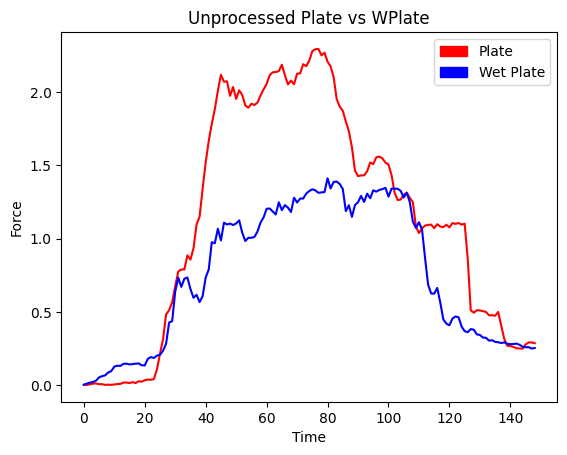

In [53]:
#Below plot shows a comparison of unprocessed plate vs wet plate force data
plt.figure(1)
plt.plot(plate_data, color="red")
plt.plot(wplate_data, color='blue')
wplate_patch = pat.Patch(color='blue', label='Wet Plate')
plate_patch = pat.Patch(color='red', label='Plate')
plt.legend(handles=[plate_patch, wplate_patch])
plt.xlabel('Time')
plt.ylabel('Force')
plt.title("Unprocessed Plate vs WPlate")

In [54]:
# Parsing the data, preserving parts that are less noisy (aka containing few continuous zeros)
# Computing a valid minimum average data length
start = 0
end = 0
plate_data = [None for i in range (10)]
wplate_data = [None for i in range (10)]
total_len = 0
total_len_w = 0
zero_thresh = 6
for i in range(1, 11):
  plate_data[i-1] = np.trim_zeros(np.asarray(pd.read_csv(f'plate{i}.txt').values.tolist()))
  for j in range(len(plate_data[i-1]) - zero_thresh):
    invalid = all(num == 0 for num in plate_data[i-1][j : j+zero_thresh])
    if invalid:
      start = j
      while plate_data[i-1][start] == 0:
        start += 1
      plate_data[i-1] = plate_data[i-1][start:]
      break
  for k in range(len(plate_data[i-1]) - 1, zero_thresh - 1, -1):
    invalid = all(num == 0 for num in plate_data[i-1][k-zero_thresh : k])
    if invalid:
      end = k
      while plate_data[i-1][end - 1] == 0:
        end -= 1
      plate_data[i-1] = plate_data[i-1][:end]
      break
  total_len += len(plate_data[i-1])
  print(plate_data[i-1].shape)
total_len /= 10


for i in range(1, 11):
  wplate_data[i-1] = np.trim_zeros(np.asarray(pd.read_csv(f'wplate{i}.txt').values.tolist()))
  for j in range(len(wplate_data[i-1]) - zero_thresh):
    invalid = all(num == 0 for num in wplate_data[i-1][j : j+zero_thresh])
    if invalid:
      start = j
      while wplate_data[i-1][start] == 0:
        start += 1
      wplate_data[i-1] = wplate_data[i-1][start:]
      break
  for k in range(len(wplate_data[i-1]) - 1, zero_thresh - 1, -1):
    invalid = all(num == 0 for num in wplate_data[i-1][k-zero_thresh : k])
    if invalid:
      end = k
      while wplate_data[i-1][end - 1] == 0:
        end -= 1
      wplate_data[i-1] = wplate_data[i-1][:end]
      break
  print(wplate_data[i-1].shape)
  total_len_w += len(wplate_data[i-1])
total_len_w /= 10 

min_len = int(min(total_len_w, total_len))
print(min_len)

(139, 1)
(59, 1)
(83, 1)
(98, 1)
(104, 1)
(111, 1)
(84, 1)
(62, 1)
(112, 1)
(131, 1)
(3, 1)
(145, 1)
(36, 1)
(148, 1)
(45, 1)
(65, 1)
(16, 1)
(123, 1)
(84, 1)
(147, 1)
81


In [55]:
print(plate_data[1])

[[0.51]
 [1.14]
 [1.55]
 [2.01]
 [2.12]
 [1.79]
 [1.95]
 [2.4 ]
 [2.4 ]
 [2.46]
 [2.58]
 [2.52]
 [2.52]
 [2.65]
 [2.65]
 [2.65]
 [2.58]
 [2.65]
 [2.65]
 [2.65]
 [2.58]
 [2.58]
 [2.46]
 [2.4 ]
 [2.34]
 [2.4 ]
 [2.28]
 [2.28]
 [2.28]
 [2.16]
 [2.16]
 [2.22]
 [2.46]
 [2.52]
 [2.65]
 [2.83]
 [2.83]
 [2.97]
 [3.1 ]
 [3.18]
 [3.1 ]
 [3.03]
 [3.03]
 [2.76]
 [3.03]
 [2.76]
 [2.83]
 [2.7 ]
 [2.4 ]
 [2.34]
 [1.84]
 [0.77]
 [0.13]
 [0.2 ]
 [0.29]
 [0.33]
 [0.26]
 [0.13]
 [0.03]]


In [56]:
# Padding / Truncating data to the previously determined data length and computing mean
plate = np.zeros(shape=(min_len, 1))
wplate = np.zeros(shape=(min_len, 1))
for i in range(10):
    if plate_data[i].shape[0] < min_len:
        plate_data[i] = np.pad(plate_data[i], [(0,min_len - plate_data[i].shape[0]),(0,0)],'constant', constant_values=0)
        plate += plate_data[i]
    else:
        plate_data[i] = plate_data[i][:min_len]
        plate += plate_data[i]
    if wplate_data[i].shape[0]  < min_len:
        wplate_data[i] = np.pad(wplate_data[i], [(0,min_len - wplate_data[i].shape[0]), (0,0)],'constant', constant_values=0)
        wplate += wplate_data[i]
    else:
        wplate_data[i] = wplate_data[i][:min_len]
        wplate += wplate_data[i]
plate /= 10
wplate /= 10

Text(0, 0.5, 'Force')

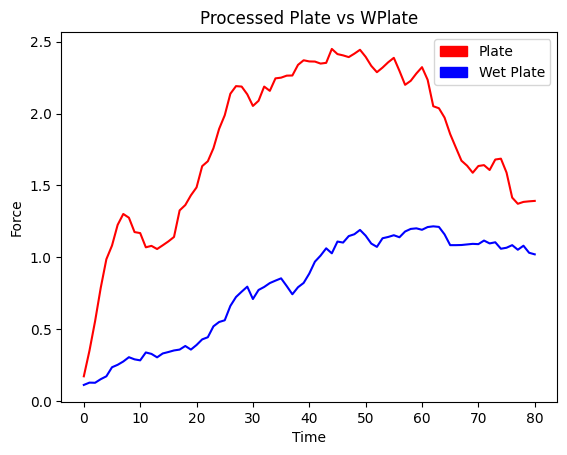

In [57]:
# Plot showing comparison of de-noised data
plt.figure(2)
plt.title('Processed Plate vs WPlate')
plt.plot(plate, color="red")
plt.plot(wplate, color='blue')
wplate_patch = pat.Patch(color='blue', label='Wet Plate')
plate_patch = pat.Patch(color='red', label='Plate')
plt.legend(handles=[plate_patch, wplate_patch])
plt.xlabel('Time')
plt.ylabel('Force')

In [58]:
# Normalizing processed data and reducing dimensionality to 2D using TSNE
plate = (plate - np.min(plate))/(np.max(plate) - np.min(plate))
wplate = (wplate - np.min(wplate))/(np.max(wplate) - np.min(wplate))
tsne = TSNE(n_components=2)
plate_t = tsne.fit_transform(plate)
tsne_w = TSNE(n_components=2)
wplate_t = tsne.fit_transform(wplate)
print(wplate_t.shape)

d:\Anaconda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\Anaconda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(81, 2)


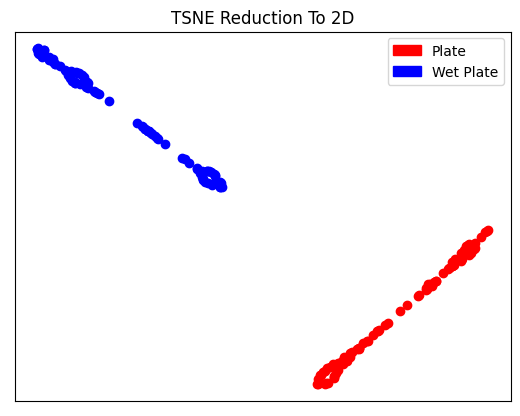

In [59]:
# Plotting correlation
plt.figure()
for i in plate_t:
    plt.scatter(i[0], i[1], color='red')
for j in wplate_t:
    plt.scatter(j[0], j[1], color='blue')
wplate_patch = pat.Patch(color='blue', label='Wet Plate')
plate_patch = pat.Patch(color='red', label='Plate')
plt.legend(handles=[plate_patch, wplate_patch])
plt.xticks([])
plt.yticks([])
plt.title('TSNE Reduction To 2D')
plt.show()

In [60]:
# Fitting plate vs wet plate data to a SVM Model

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
y_plate = [0 for i in range(10)]
y_wplate = [1 for i in range (10)]

# plate_data = (plate_data - np.min(plate_data)) / (np.max(plate_data) - np.min(plate_data)).flatten()
# wplate_data = (wplate_data - np.min(wplate_data)) / (np.max(wplate_data) - np.min(wplate_data)).flatten()
print(type(plate_data))
xp_train, xp_test, yp_train, yp_test = train_test_split(plate_data, y_plate, test_size=0.2, random_state=42)
xw_train, xw_test, yw_train, yw_test = train_test_split(wplate_data, y_wplate, test_size=0.2, random_state=42)
xp_train.extend(xw_train)
xp_test.extend(xw_test)
yp_train.extend(yw_train)
yp_test.extend(yw_test)
model = SVC(kernel='rbf', C=3, gamma='auto')
for i in range(len(xp_train)):
    xp_train[i] = xp_train[i].flatten().tolist()
for j in range(len(xp_test)):
    xp_test[j] = xp_test[j].flatten().tolist()
model.fit(xp_train, yp_train)
acc = model.score(xp_test, yp_test)
train_acc = model.score(xp_train, yp_train)
print(f'Validation accuracy of SVM is: {acc}')
print(f'Training accuracy of SVM is: {train_acc}')


<class 'list'>
Validation accuracy of SVM is: 0.75
Training accuracy of SVM is: 0.9375
